# Test Evaluation Metrics

During evaluation when training the model, images are put into `metrics/PRED_DIR/` and `metrics/TARG_DIR/`, so this file is used to visually test the results.

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt

In [2]:
pred_image = cv2.imread("./metrics/PRED_DIR/hurricane-florence_00000103_post_disaster.png")
targ_image = cv2.imread("./metrics/TARG_DIR/hurricane-florence_00000103_post_disaster.png")
orig_image = cv2.imread("./data/train/images/hurricane-florence_00000103_post_disaster.png")

Pred, original, targ


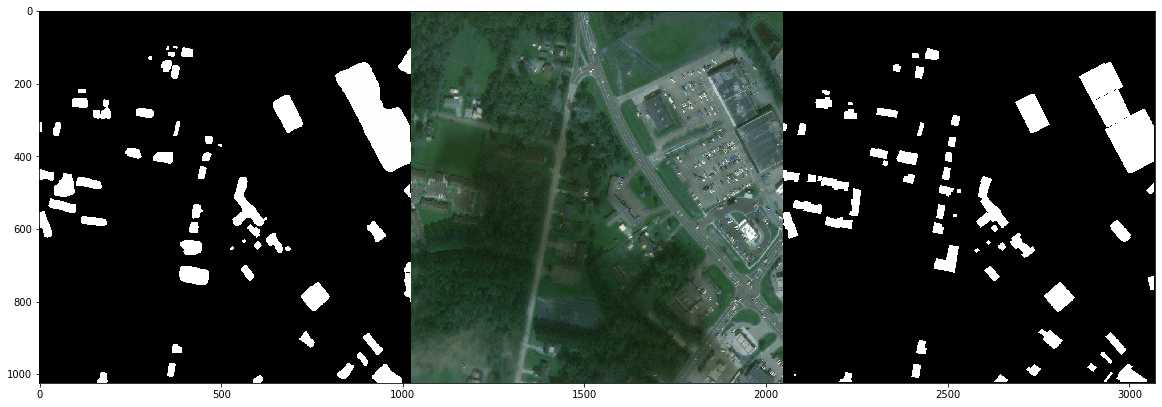

In [3]:
image = np.hstack([pred_image * 255, orig_image, targ_image * 255])
plt.figure(figsize=(20, 10))
plt.imshow(image)
print("Pred, original, targ")